# [without library] <font color="orange">Logistic Regression for Binary Classification
</font>

### Based on [2010] Generative and Discriminative Classifiers - Naive Bayes and Logistic Regression - <font color=magenta>Tom Mitchell</font>

### Imports

In [1]:
import numpy as np #arrays for data points
import pandas as pd #input
from numpy.random import rand
from numpy import mean, std #mean and standard deviation for gaussian probabilities
from scipy.stats import norm #gaussian probabilities
from math import log # to calculate posterior probability

### Constants

In [2]:
learning_rate = 0.01

### Environment

#### Machine Learning Mastery

<img src="../assets/images/MLMastery-LogisticRegression.png">

In [3]:
f_data = '../input/ml_mastery/MLMastery-LogisticRegression.csv'

### Data

#### read the csv file

In [4]:
#read the csv file
df = pd.read_csv(f_data)

#### Sanity check for data getting loaded

In [5]:
print(df.head(2))

         X1        X2  Y
0  2.781084  2.550537  0
1  1.465489  2.362125  0


### Model

#### Helper Functions

##### linear combination of weights and coefficients

In [6]:
def lin_com(w, x):
    return np.dot(w, x)

##### P(Y=0|X,W)

In [7]:
def prob_y0_x(w, x):
    lc = lin_com(w, x)
    return 1/(1 + np.exp(lc))

##### P(Y=1|X,W)

In [8]:
def prob_y1_x(w, x):
    lc = lin_com(w, x)
    return np.exp(lc)/(1 + np.exp(lc))

##### ln(W) = sigma_l (Y * ln(P(Y=1|X,W)) + (1-Y) * ln(P(Y=0|X,W))) - <font color='magenta'>conditional data log-likelihood</font>

In [9]:
#conditional data log-likelihood ln(P(Y|X,W))
def cond_data_log_likelihood(X, Y, w):
    likelihood = 0.0
    for l in range(len(X)):
        likelihood += (Y[l]*log(prob_y1_x(w, X[l])) + (1 - Y[l])*log(prob_y0_x(w, X[l])) )
    return (likelihood)

##### d(ln(W))/dW_i - <font color='magenta'>gradient along attribute 'i'</font>

In [10]:
#gradient along the attribute 'i'
def gradient(X, Y, w, i):
    grad = 0.0
    #iterate over all data-points
    for l in range(len(X)):
        grad += X[l][i]*(Y[l] - prob_y1_x(w, X[l]))
    return grad

##### <font color='magenta'>gradients along attributes</font>

In [11]:
#gradient along each attribute
def gradients(X, Y, w):
    #gradient along each attribute
    grads = np.zeros(len(w), dtype=float)
    for i in range(len(w)):
        grads[i] = gradient(X, Y, w, i)
        
    return grads

##### apply gradients on coefficients

In [12]:
def apply_gradient(w, grads, learning_rate):
    return (w + (learning_rate * grads))

#### Training Algorithm

In [13]:
def train(X, Y, w, learning_rate):
    #learn
    prev_max = cond_data_log_likelihood(X, Y, w)
    grads = gradients(X, Y, w)
    w = apply_gradient(w, grads, learning_rate)
    new_max = cond_data_log_likelihood(X, Y, w)
    while(abs(prev_max - new_max) > 0.01):
        prev_max = new_max
        grads = gradients(X, Y, w)
        w = apply_gradient(w, grads, learning_rate)
        new_max = cond_data_log_likelihood(X, Y, w)

    return w

#### Train

In [14]:
#prepare X and Y

N = len(df) #number of datapoints
#even though len(df_columns) adds +1 for the class column 'Y',
# we use this extra count to accomodate for X0 = 1 (the attribute for bias)
num_attributes = len(df.columns) #number of attributes
X_attr = df.loc[:, df.columns != 'Y'].to_numpy() #input attributes
X = np.ones((N, num_attributes), dtype=float) #input + bias attribute
X[:, 1:] = X_attr
Y = df.loc[:, df.columns == 'Y'].to_numpy()

#weights
w = np.zeros((num_attributes), dtype=float)
w = train(X, Y, w, learning_rate)

##### weights (coefficients)

In [15]:
print('The learnt weights (coefficients) are:', w)

The learnt weights (coefficients) are: [-0.48985449  0.99888324 -1.4328438 ]


#### Predict

In [16]:
#predict for class=1
N = len(df) #number of datapoints
y_pred = np.zeros(N, dtype=float)
for i in range(N):
    x = X[i]
    y_pred[i] = prob_y1_x(w, x)

##### accuracy

In [17]:
matches = sum([int(pred==actual) for pred, actual in zip(y_pred>0.5, Y.reshape(len(Y))>0)])

In [18]:
print('Accuracy is', (matches*100)/len(Y), 'percent.')

Accuracy is 100.0 percent.


##### plot the predictions

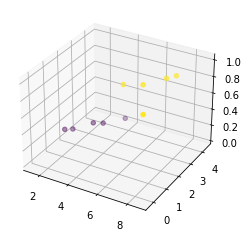

In [19]:
#plot
#matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 1], X[:, 2], y_pred, c = (y_pred>0.5))
plt.show()

In [20]:
l_pred = [y_pred[i].argmax() for i in range(N)]
matches = sum([int(pred==actual) for pred, actual in zip(l_pred, Y)])
print('Accuracy is', (matches*100)/len(Y), 'percent.')

Accuracy is 50.0 percent.
